In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import documents as docs
import comparisons 
import comparisonsmachine as machine 
import random
import time
import utils

start = time.time()

data_folder = "data"
results_folder = "results"
para_sep = "\n"

dd = comparisons.DuplicationDetection(thresh_jaccard = .5, thresh_same_sent = .9, thresh_same_doc = .25)

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))

display(article_df.head(2))
print("Setup time: %d seconds" % np.round(time.time() - start))

,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,beforeitsnews.com,2019-06-01T04:51:24-04:00,True,https://beforeitsnews.com/v3/christian-news/20...,"47:2-3, 8-",First Option - Responsorial Psalm: Psalms 47:2...,"{'wordCounts': {'2': 1, '713350': 1, '14736': ...",NaN,None,0.0
1,1,thehindu.com,2019-06-01T08:44:25-04:00,True,https://www.thehindu.com/news/cities/Coimbator...,"In Gudalur, meat will come packed in Koova lea...","ePaper \n Just In \n In Gudalur, meat will com...","{'wordCounts': {'80836': 1, '3': 314, '11': 15...",NaN,None,0.0


Setup time: 3 seconds


In [17]:
article_df["text"][234]

"Explosion at Russian TNT plant injures 79 \n Updated \n 11:10\xa0am CDT, Saturday, June 1, 2019 \n MOSCOW (AP) — Russia's health ministry says 79 people have been injured in an explosion in a plant manufacturing TNT. \n The blast took place Saturday in Dzerzhinsk, 400 kilometers (250 miles) east of Moscow. An investigation is underway but the cause of the blast has not been determined. \n The ministry said 38 employees at the plant and 41 local residents sought treatment after the blast. It said 15 were hospitalized, one in serious condition. \n The blast broke windows in about 180 residential buildings near the plant, the state news agency Tass reported, citing city authorities. \n Dmitry Krasnov, deputy governor of the region that includes Dzerzhinsk, said earlier on state TV that two people were missing in the blast, but later said that information had not been confirmed."

In [18]:
n = 20
start = time.time()
#sample = random.sample(list(article_df["id"]), n)
sample = [i for i in range(n)]#f article_df.loc[i, "event"] == 1]
print("n articles: ", len(sample)) #, sample)
article_dict = dd.dict_by_ids(article_df, sample, para_sep = para_sep, parser = "spacy")
elapsed = round(time.time() - start, 2)
print("Time taken to run cell: %f s (%f s per document)" % (elapsed, elapsed/n))


n articles:  20
Time taken to run cell: 8.700000 s (0.435000 s per document)


In [19]:
sim_mat = dd.similarity_mat(article_dict)

0 of 20 rows completed, 0.00m elapsed


In [20]:
dd.cluster_articles(sim_mat)
dd.prop_unique_clusters()

0.95

In [21]:
comparer = machine.MultiComparisons()
article_dict = comparer.dict_by_ids(article_df, sample)
sim_mat_mp = comparer.run(article_dict)

Loaded documents via multiprocessing, 0.80m elapsed
0 of 190 comparisons made, 0.00m elapsed
Finished document comparisons via multiprocessing, 0.01m elapsed


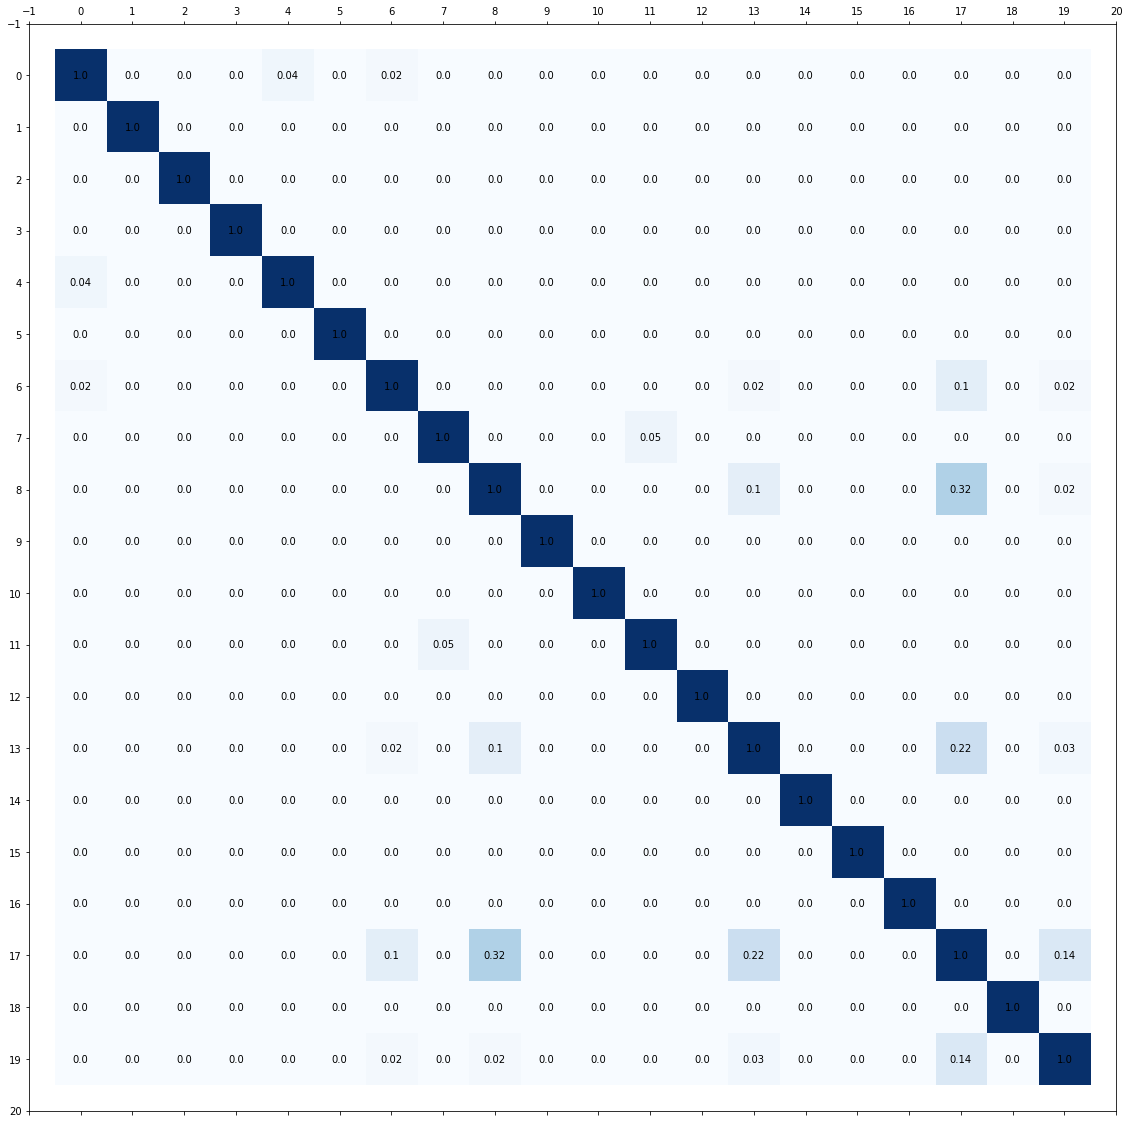

In [22]:
utils.display_mat(utils.subsetmat(sim_mat, [i for i in range(20)]))

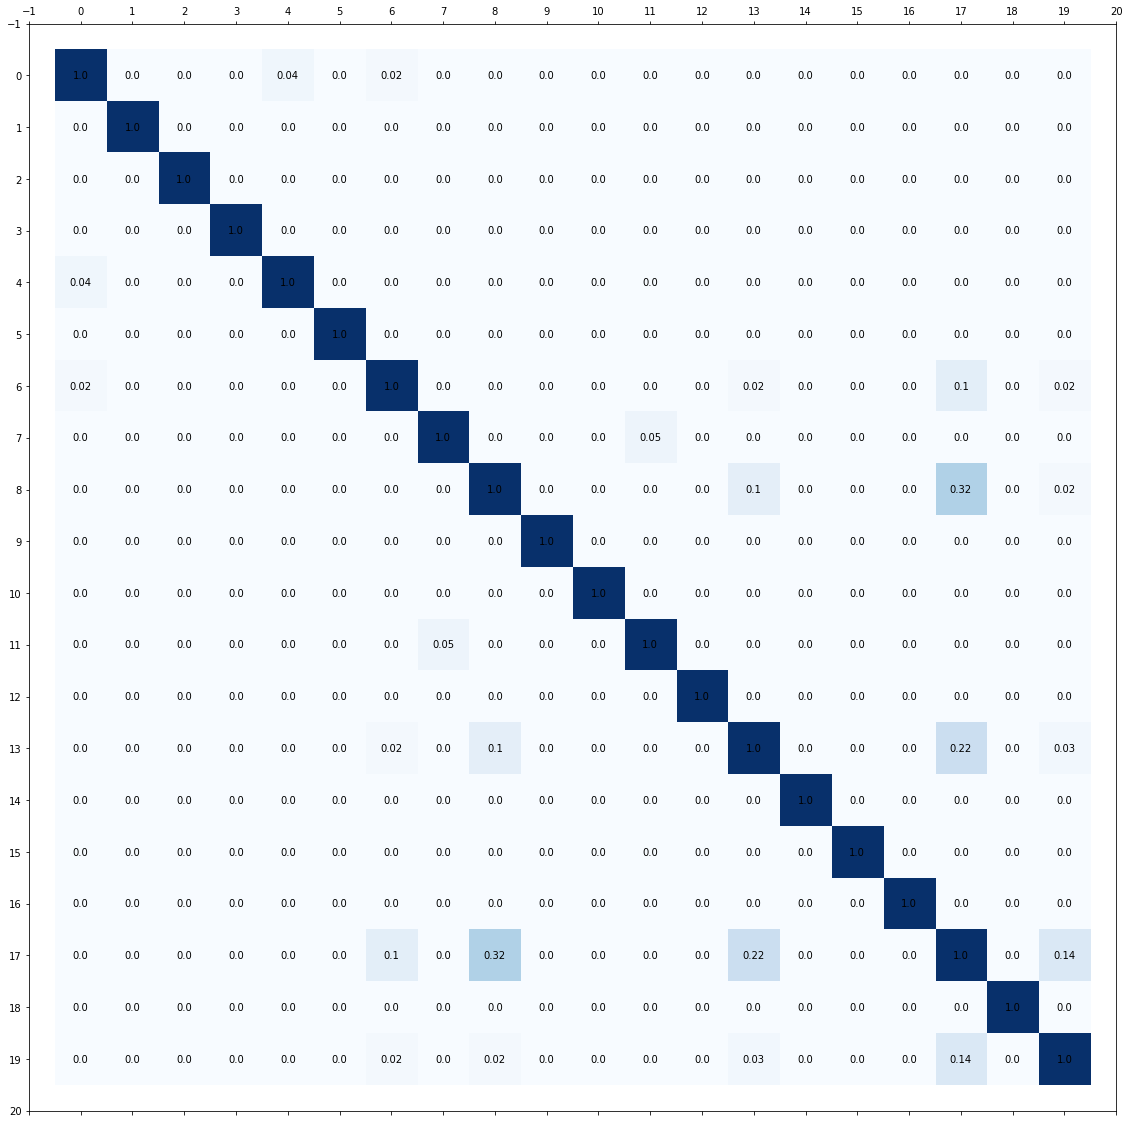

In [23]:
utils.display_mat(utils.subsetmat(sim_mat_mp, [i for i in range(20)]))

In [67]:
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))

n = 100
sample = random.sample(list(article_df["id"]), n)
good_ids = [sample[i] for i in np.where(article_df.loc[sample, "paywall"] == 0)[0]]
bad_ids = [i for i in sample if i not in good_ids]

print("Random sample of %d articles from 2019/06/01; %d 'bad' articles found" % (n, len(bad_ids)))
print(">>> Bad article texts: \n")
for i in bad_ids:
    print("Article %d: \n" % (i), article_df["text"][i], "\n")
    
print(">>> Good article example texts: \n")
for i in random.sample(good_ids, 5):
    print("Article %d: \n" % (i), article_df["text"][i], "\n")

Random sample of 100 articles from 2019/06/01; 18 'bad' articles found
>>> Bad article texts: 

Article 88246: 
 Eugene, Ore. – Saturday, June 1, 2019 
 Theft from Vehicle on Saturday, June 1, 2019 @ 7:34 a.m. PDT 
 Incident description: Theft from Vehicle 
 Disposition: REPT 

Article 97996: 
 Destroying the Illusion: [8.14] Censorship Continues, NBC Q Attack, Mysterious Deaths, UFO Limited Hangout 
 10 months ago 
 http://www.destroyingtheillusion.com (Subscribe to the newsletter to stay in touch!) 
 Social Media: 
 Thank YOU for watching and supporting! 
 You may also like 
 3,119 views  
 Feed suspended! Please contact the owner. March 1, 2019 
 The Event Chronicle is a daily alternative news blog for people interested in seeking truth and exploring alternate view points not covered in the mainstream.  

Article 17294: 
 BBC World Service 
 This programme will be available shortly after broadcast 
 2019/06/02 00:01 GMT 
 The latest five minute news bulletin from BBC World Service. 

 Topics: 

Article 94851: 
 Editor Dad: Sweet, sweet summer break 
  
 David Manley CantonRep.com business editor 
 Saturday 
 Jun 1, 2019 at 8:00 AM 
 The end of the school year really is one of the best feelings in the world. 
 With the air conditioner and most of the lights turned off, I recall sitting with my classmates watching an educational science film made at a time when everything was covered in shag carpeting and everyone wore turtlenecks. We were one big sweaty mess, but no one cared. 
 The school year was moments from ending, and a sweet summer full of sleeping in and playing outside was in front of us. 
 It really is one of the best feelings in the world. And that's not to knock school, but when you reach the end of the year, you need a break. And it's important to have that feeling of a task completed. As a kid, I beamed with pride thinking about how I was moving on to the next grade. 
 My daughter, 7, said she felt it strange that not too long ago all of the older kids 

In [68]:
article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20180715"))

n = 100
sample = random.sample(list(article_df["id"]), n)
good_ids = [sample[i] for i in np.where(article_df.loc[sample, "paywall"] == 0)[0]]
bad_ids = [i for i in sample if i not in good_ids]

print("Random sample of %d articles from 2018/07/15; %d 'bad' articles found" % (n, len(bad_ids)))
print(">>> Bad article texts: \n")
for i in bad_ids:
    print("Article %d: \n" % (i), article_df["text"][i], "\n")
    
print(">>> Good article example texts: \n")
for i in random.sample(good_ids, 5):
    print("Article %d: \n" % (i), article_df["text"][i], "\n")

Random sample of 100 articles from 2018/07/15; 27 'bad' articles found
>>> Bad article texts: 

Article 33338: 
 Winning numbers drawn in ‘Pick 3 Evening’ game | Bradenton Herald ### Winning numbers drawn in ‘Pick 3 Evening’ game ### The Associated Press ### July 15, 2018 08:24 PM ### TALLAHASSEE, Fla. ### The winning numbers in Sunday evening's drawing of the Florida Lottery's "Pick 3 Evening" game were: ### 8-3-0 ### SIGN UP ### Be the first to know. ### No one covers what is happening in our community better than we do. And with a digital subscription, you'll never miss a local story. 

Article 16114: 
 Events ### Get Madison Magazine delivered to your office or home. ### Gift subscriptions now available! 

Article 45865: 
 200 ### Analysis ### I was hoping to get eight and a half and probably could have a while ago but it was not widely available. At 9 if it should land on 9 it's a portion not a lost so let's go for it. ### Pick Creation Time: 

Article 37858: 
        ### Timothy 

 Royals release new photos to mark Prince Louis’s christening | The Sun Herald ### About Us ### This Monday, July 9, 2018, photo provided by the Duke and Duchess of Cambridge shows the official photograph to mark the christening of Prince Louis at Clarence House, following Prince Louis’ baptism, in London. Seated, left to right: Prince George, Prince William, the Duke of Cambridge; Prince Louis; Kate, the Duchess of Cambridge; and Princess Charlotte. Standing, left to right: Prince Harry, The Duke of Sussex; Megan, the Duchess of Sussex; Camilla, the Duchess of Cornwall; Prince Charles, Prince of Wales; Carole Middleton, Michael Middleton, Pippa Matthews, James Matthews and James Middleton. (Matt Holyoak/Camera Press/Duke and Duchess of Cambridge via AP) Matt Holyoak AP ### This Monday, July 9, 2018, photo provided by the Duke and Duchess of Cambridge shows the official photograph to mark the christening of Prince Louis at Clarence House, following Prince Louis’ baptism, in London. Sea

 Last Updated : Jul 16, 2018 11:06 AM IST    | Source: Moneycontrol.com ### 3i Infotech hits 52-week low on poor Q1 numbers ### The company's Q1 net profit was down 28 percent at Rs 6.04 crore against Rs 8.38 crore in the same quarter last fiscal. ### More ### × ### Shares of 3i Infotech touched 52-week low of Rs 3.50, falling 7 percent intraday Monday on the back of poor June quarter numbers. ### The company's Q1 net profit was down 28 percent at Rs 6.04 crore against Rs 8.38 crore in the same quarter last fiscal. ### Meanwhile, the net sales were up 1 percent to Rs 241.98 crore against Rs 239.31 crore. ### The operating profit for Q1 was at Rs 27.08 crore versus Rs 28.63 crore in 01 FY2018. ### At 10:52 hrs 3i Infotech was quoting at Rs 3.65, down Rs 0.12, or 3.18 percent. ### Posted by Rakesh Patil 

Article 7798: 
 Sports / ### The Associated Press PARKER BACK HOME: Jabari Parker dribbles during the second half of the Bucks' game against the Philadelphia 76ers in Milwaukee on March